<a href="https://colab.research.google.com/github/jHrdy/Data/blob/main/house-price-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rukenmissonnier/final-house")

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

data_list = os.listdir(path)
df = pd.read_csv(os.path.join(path, data_list[0]))

In [14]:
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [16]:
def plot_x_against_y(x_name, y_name='price'):
    plt.scatter(df[x_name], df[y_name])
    plt.title(f'{x_name} vs. {y_name}')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.grid(True)
    plt.show()

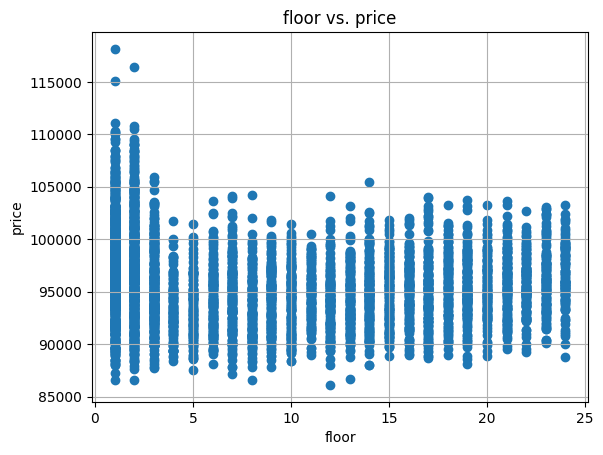

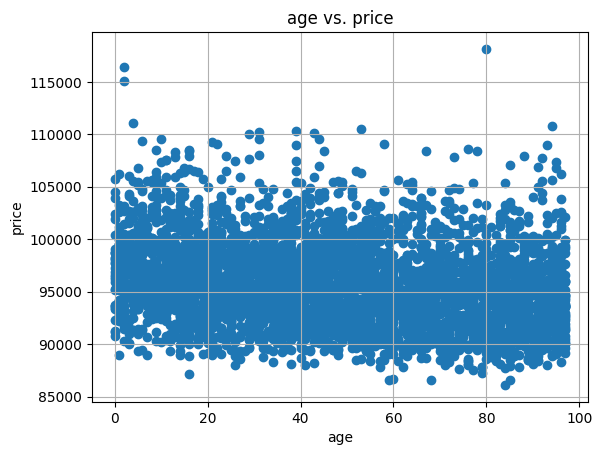

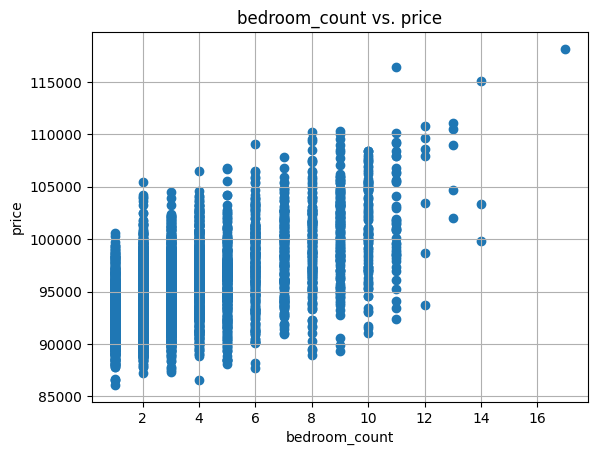

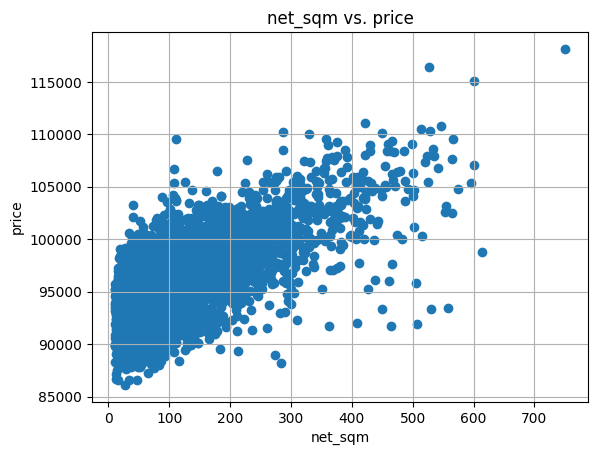

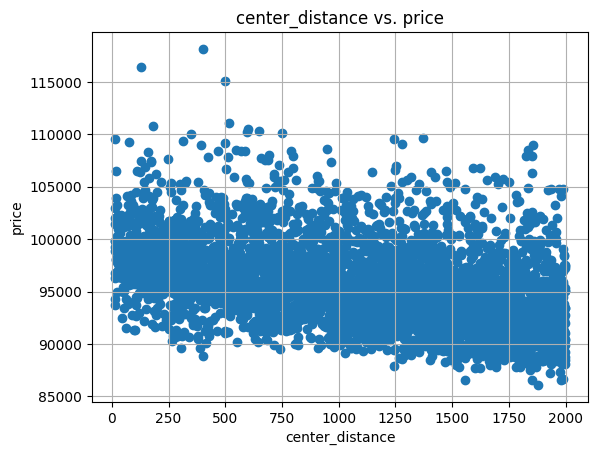

In [19]:
plot_x_against_y('floor')
plot_x_against_y('age')
plot_x_against_y('bedroom_count')
plot_x_against_y('net_sqm')
plot_x_against_y('center_distance')

# First Approach
#### Even though it looks like some parameters do not have major impact on the price we may still try to predict it using all columns.  

In [27]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

,price
0,96004.804557
1,92473.722568
2,98112.519942
3,92118.326874
4,98976.653176
...,...
4303,102707.356224
4304,99695.064992
4305,93803.715617
4306,92914.729126


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

y_train

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.3826627 ],
       [0.63364582],
       [0.40639042],
       ...,
       [0.3160823 ],
       [0.17523259],
       [0.22879547]])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
